In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np

In [81]:

## AUTENTICAÇÃO NA API
def get_token(email,senha):
    ## BODY PARA REQUISIÇÃO NA API
    body = {"email": email,"password": senha}
    
    ## CHAMADA NA API
    r = requests.post('https://api.oplab.com.br/v3/domain/users/authenticate',json=body).json()['access-token']
    return r


## FUNÇÃO PARA RETORNAR A SÉRIE HISTÓRICA
def getFechamentosPorData(token,symbol,data_inicio,data_fim,resolution="1d"):     
    ## HEADER DE AUTENTICAÇÃO
    header = {"Access-Token": token}
    
    ## CHAMADA NA API 
    dados = requests.get('https://api.oplab.com.br/v3/market/historical/{}/{}?from={}&to={}?smooth=true'.format(
    symbol, resolution, data_inicio.strftime("%Y%m%d%H%M"), data_fim.strftime("%Y%m%d%H%M")),
                        headers=header).json()['data']
    ## CONSTRUÇÃO DO DATAFRAME NO PANDAS
    fechamentos = []
    datas_list = []
    for i in dados:
        fechamentos.append(i['close'])
        datas_list.append(datetime.fromtimestamp(int(str(i['time'])[:10])))
    df = pd.DataFrame({'Close': fechamentos}, index = datas_list)
    return df

In [87]:
## ABRIR ARQUIVO PARA COLETAR MEUS DADOS


csv_aut = pd.read_excel('c:/MM/token_oplab.xls')
csv_aut['email'][0]

email = csv_aut['email'][0] ## AQUI VOCÊ USA SEU EMAIL DE LOGIN DO OPLAB 
senha = csv_aut['senha'][0] ## AQUI VOCÊ COLOCA SUA SENHA CADASTRADA

##get_token(email,senha) ## VOCÊ PODE CHAMAR A FUNÇÃO PARA VER O OUTPUT

## INPUTS DA FUNÇÃO
token = get_token(email,senha)
symbol = 'PETR4'
##data_inicio = datetime(2020,1,1) ## USAR DATA ESPECÍFICA
data_inicio = datetime.today() - timedelta(days=365)
data_fim = datetime.today()

## CHAMAR FUNÇÃO
df = getFechamentosPorData(token,symbol,data_inicio,data_fim)

df


,Close
2021-08-30,17.022368
2021-08-31,16.354706
2021-09-01,16.264482
2021-09-02,15.999823
2021-09-03,15.837419
...,...
2022-08-22,32.410000
2022-08-23,33.440000
2022-08-24,33.640000
2022-08-25,33.280000


In [83]:
## CRIAR MÉDIAS MÓVEIS COM O ROLLING MEAN DO PANDAS

periodos_mm1 = 50
periodos_mm2 = 100
df_mean1 = df.rolling(periodos_mm1).mean()
df_mean2 = df.rolling(periodos_mm2).mean()

df_mean2


,Close
2021-08-30,NaN
2021-08-31,NaN
2021-09-01,NaN
2021-09-02,NaN
2021-09-03,NaN
...,...
2022-08-22,24.717665
2022-08-23,24.827409
2022-08-24,24.942109
2022-08-25,25.055290


<AxesSubplot:>

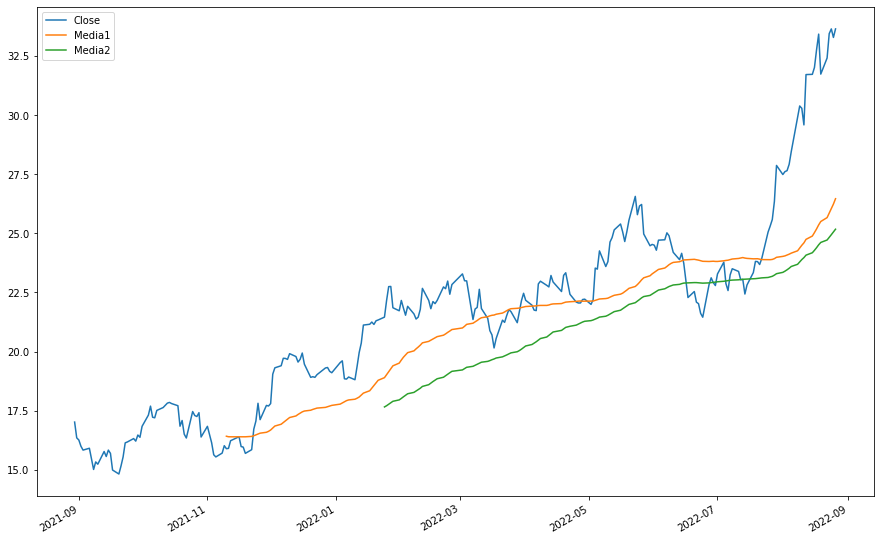

In [84]:
## CRIAR NOVO DF PARA MANTER ORIGINAL
df2 = df

## INSERIR DADOS NO DATAFRAME ORIGINAL
df2['Media1'] = df_mean1['Close'].values
df2['Media2'] = df_mean2['Close'].values

## PLOT
df2.plot(figsize = (15,10))

In [85]:
## CRIAR FUNÇÃO PARA CALCULAR MÉDIA MÓVEL
def simple_ma(lista_cotacoes,periodos):
    if len(lista_cotacoes) <= periodos or periodos <= 0:
        print('Problemas no tamanho da amostra!!!')
        return 0
    else:
        lista_mean = []
        for j in range(periodos):
            lista_mean.append(None)
        contador = 0
        while (contador+periodos) < len(lista_cotacoes):
            indicador = np.mean(lista_cotacoes[contador:contador+periodos])
            lista_mean.append(indicador)
            contador += 1
        return lista_mean

## USAR FUNÇÃO PARA CRIAR LISTA DE MÉDIAS
lista_media1 = simple_ma(df['Close'].values,50)
lista_media2 = simple_ma(df['Close'].values,100)

lista_media1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 16.423998895543345,
 16.401743502463088,
 16.399337514021976,
 16.40210440072925,
 16.40186380188514,
 16.404390089748304,
 16.400059310554308,
 16.416780930220018,
 16.444449797292773,
 16.480900522175574,
 16.52168202625238,
 16.55283957656474,
 16.590613595090154,
 16.63067330263462,
 16.68685313273452,
 16.771256169644,
 16.854295374211418,
 16.93138161973752,
 17.00287142144945,
 17.073505103246717,
 17.140445658620703,
 17.214387245355415,
 17.280738136059874,
 17.34431249913582,
 17.401041627595358,
 17.45350571362323,
 17.48898829929879,
 17.52270539916163,
 17.557440990241993,
 17.585383717846174,
 17.613203954508784,
 17.6429364911

<AxesSubplot:>

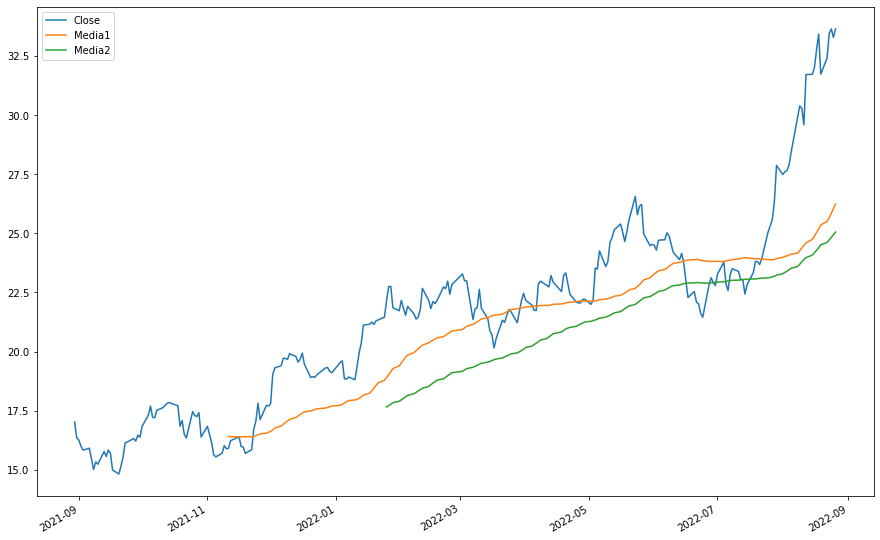

In [86]:
## CRIAR NOVO DF PARA MANTER ORIGINAL
df3 = df

## INSERIR DADOS NO DATAFRAME ORIGINAL
df3['Media1'] = lista_media1
df3['Media2'] = lista_media2

## PLOT
df3.plot(figsize = (15,10))